<a href="https://colab.research.google.com/github/CyberMaryVer/detectron-doc/blob/master/Tutorial_for_alphapose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation

In [ ]:
! pip install pyyaml==5.2
! pip install scipy==1.1.0
! pip install torch==1.2.0 torchvision==0.4.0
! pip install pillow==6.2.2
import torch
print(torch.__version__)
import yaml, scipy
print(yaml.__version__)
print(scipy.__version__)

     |████████████████████████████████| 266kB 5.5MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.2-cp37-cp37m-linux_x86_64.whl size=44209 sha256=959d752970438e58cdb73e2d6f644b176c159b71781fe067aa7fd46385a6ea19
  Stored in directory: /root/.cache/pip/wheels/54/b7/c7/2ada654ee54483c9329871665aaf4a6056c3ce36f29cf66e67
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 31.2MB 104kB/s 
ERROR: plotnine 0.6.0 has requirement scipy>=1.2.0, but you'll have scipy 1.1.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
     |████████████████████████████████| 748.9MB 22kB/s 
     |████████████████████████████████| 8.8MB 15.0MB/s 
  Found existing installation: 

1.2.0
5.2
1.1.0


In [ ]:
!git clone https://github.com/MVIG-SJTU/AlphaPose.git

Cloning into 'AlphaPose'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 2161 (delta 0), reused 2 (delta 0), pack-reused 2155
Receiving objects: 100% (2161/2161), 108.41 MiB | 18.22 MiB/s, done.
Resolving deltas: 100% (1039/1039), done.


In [ ]:
import os
# !rm -rf /content/AlphaPose
os.chdir('/content/')

In [ ]:
import torch
print(torch.__version__)
import yaml, scipy
print(yaml.__version__)
print(scipy.__version__)

1.2.0
5.2
1.1.0


In [ ]:
!python -m pip install cython
!sudo apt-get install libyaml-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libyaml-doc
The following NEW packages will be installed:
  libyaml-dev
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 55.7 kB of archives.
After this operation, 246 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libyaml-dev amd64 0.1.7-2ubuntu3 [55.7 kB]
Fetched 55.7 kB in 1s (46.8 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package libyaml-dev:amd64.
(Re

In [ ]:
os.chdir('/content/AlphaPose')
print(os.getcwd())
! python setup.py build develop

/content/AlphaPose
running build
running build_py
creating build
creating build/lib.linux-x86_64-3.7
creating build/lib.linux-x86_64-3.7/trackers
copying trackers/tracker_api.py -> build/lib.linux-x86_64-3.7/trackers
copying trackers/tracker_cfg.py -> build/lib.linux-x86_64-3.7/trackers
copying trackers/__init__.py -> build/lib.linux-x86_64-3.7/trackers
creating build/lib.linux-x86_64-3.7/alphapose
copying alphapose/__init__.py -> build/lib.linux-x86_64-3.7/alphapose
copying alphapose/version.py -> build/lib.linux-x86_64-3.7/alphapose
copying alphapose/opt.py -> build/lib.linux-x86_64-3.7/alphapose
creating build/lib.linux-x86_64-3.7/trackers/tracking
copying trackers/tracking/matching.py -> build/lib.linux-x86_64-3.7/trackers/tracking
copying trackers/tracking/__init__.py -> build/lib.linux-x86_64-3.7/trackers/tracking
copying trackers/tracking/basetrack.py -> build/lib.linux-x86_64-3.7/trackers/tracking
creating build/lib.linux-x86_64-3.7/trackers/ReidModels
copying trackers/ReidMode

In [ ]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

! mkdir /content/AlphaPose/detector/yolo/data
file_id = '1D47msNOOiJKvPOXlnpyzdKA3k6E97NTC'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('/content/AlphaPose/detector/yolo/data/yolov3-spp.weights')

! mkdir /content/AlphaPose/detector/tracker/data
file_id = '1nlnuYfGNuHWZztQHXwVZSL_FvfE551pA'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('/content/AlphaPose/detector/tracker/data/JDE-1088x608-uncertainty')

file_id = '1kQhnMRURFiy7NsdS8EFL-8vtqEXOgECn'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('/content/AlphaPose/pretrained_models/fast_res50_256x192.pth')



# Inference for image

In [ ]:
import os
os.chdir('/content/AlphaPose')
! ls
! python3 scripts/demo_inference.py --cfg configs/coco/resnet/256x192_res50_lr1e-3_1x.yaml --checkpoint pretrained_models/fast_res50_256x192.pth --indir examples/demo/ --save_img
# result json and rendered images are saved here:
! ls examples/res/vis

alphapose	    configs   examples		 README.md  setup.py
alphapose.egg-info  detector  LICENSE		 scripts    trackers
build		    docs      pretrained_models  setup.cfg
Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
 87% 85.1M/97.8M [00:02<00:00, 50.0MB/s]Loading YOLO model..
100% 97.8M/97.8M [00:02<00:00, 39.1MB/s]
Loading pose model from pretrained_models/fast_res50_256x192.pth...
100% 4/4 [00:00<00:00,  8.12it/s]
===========================> Finish Model Running.
===========================> Rendering remaining images in the queue...
===========================> If this step takes too long, you can enable the --vis_fast flag to use fast rendering (real-time).
===========================> Rendering remaining 4 images in the queue...
===========================> Rendering remaining 1 images in the queue...
===========================> Rendering remaining 0 images in the queue...
Results have been written to 

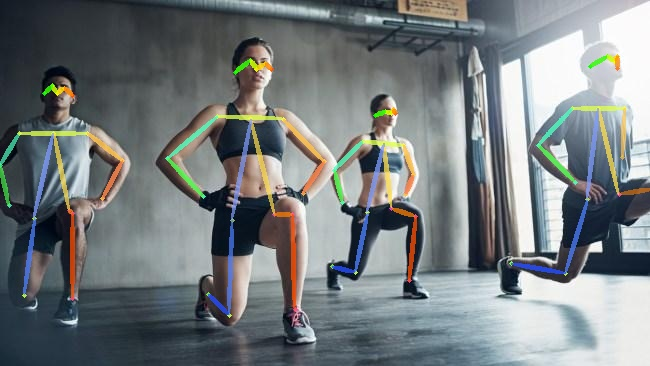

In [48]:
from google.colab.patches import cv2_imshow
im = cv2.imread("/content/AlphaPose/examples/res/vis/example_.jpg")
cv2_imshow(im)

# Inference for video

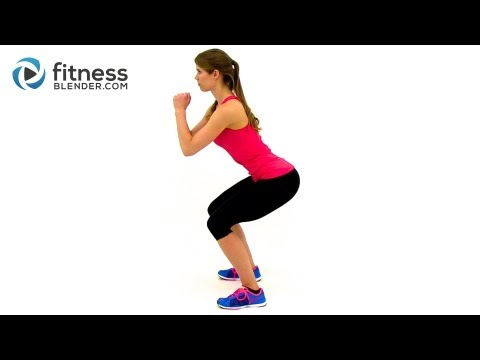

In [ ]:
# This is the video we're going to process
from IPython.display import YouTubeVideo, display
video = YouTubeVideo("mGvzVjuY8SY", width=500)
display(video)

In [ ]:
!pip install youtube-dl

     |████████████████████████████████| 1.9MB 4.3MB/s 


In [ ]:
!youtube-dl https://www.youtube.com/watch?v=mGvzVjuY8SY -f 22 -o video_.mp4
!mkdir test
!ffmpeg -i video_.mp4 -ss 00:00:47 -t 10 -c:v copy test/video-clip.mp4

* extract frames

In [ ]:
# !mkdir test/imgs
# !ffmpeg -i test/video-clip.mp4 -r 1/1 test/imgs/frame%03d.jpg

In [ ]:
# ! python3 scripts/demo_inference.py --cfg configs/coco/resnet/256x192_res50_lr1e-3_1x.yaml --checkpoint pretrained_models/fast_res50_256x192.pth --indir test/imgs --save_img

* use --save_video parameter

In [ ]:
! python3 scripts/demo_inference.py --cfg configs/coco/resnet/256x192_res50_lr1e-3_1x.yaml --checkpoint pretrained_models/fast_res50_256x192.pth --indir examples/res/vis --video test/video-clip.mp4 --save_video

Loading pose model from pretrained_models/fast_res50_256x192.pth...
Loading YOLO model..
  1% 11/1501 [00:04<12:22,  2.01it/s]Could not find encoder for codec id 27: Encoder not found
Try to use other video encoders...
100% 1501/1501 [04:04<00:00,  6.14it/s]
===========================> Finish Model Running.
===========================> Rendering remaining images in the queue...
===========================> If this step takes too long, you can enable the --vis_fast flag to use fast rendering (real-time).
===========================> Rendering remaining 516 images in the queue...
Results have been written to json.


In [ ]:
!ffmpeg -i examples/res/AlphaPose_video-clip.mp4 -t 5 -c copy ../output.mp4

In [43]:
from IPython.display import HTML
from base64 import b64encode

# Input video path
save_path = "/content/output.mp4"
# Compressed video path
compressed_path = "/content/output_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)